<a href="https://colab.research.google.com/github/yuto-sb/my-repository/blob/main/GCI%E3%82%B3%E3%83%B3%E3%83%9A1%E3%82%A2%E3%83%B3%E3%82%B5%E3%83%B3%E3%83%96%E3%83%AB%E6%B8%88%E3%81%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [87]:
path =  '/content/drive/MyDrive/02.コンペ1（10 28公開済）/'

df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

In [88]:
df.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,1,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Train欠損数: 0
Test欠損数: 0
Perished
0.000000    77
1.000000    27
0.250000     2
0.500000     1
0.857143     1
0.666667     1
Name: count, dtype: int64
Perished
1.000000    76
0.000000    14
0.500000     6
0.666667     2
0.750000     1
Name: count, dtype: int64
Dead_list =  {'Palsson', 'Arnold-Franchi', 'Boulos', 'Cacic', 'Skoog', 'Strom', 'Attalah', 'Van Impe', 'Elias', 'Danbom', 'Panula', 'Barbara', 'Rosblom', 'Rice', 'Ford', 'Oreskovic', 'Olsson', 'Jussila', 'Lefebre', 'Zabour', 'Goodwin', 'Turpin', 'Johnston', 'Vander Planke', 'Bourke', 'Sage', 'Lobb'}
Survived_list =  {'McCoy', 'Taylor', 'Frauenthal', 'Chambers', 'Jussila', 'Dick', 'Beckwith', 'Goldenberg', 'Bishop', 'Duff Gordon', 'Nakid', 'Daly', 'Moubarek', 'Beane'}


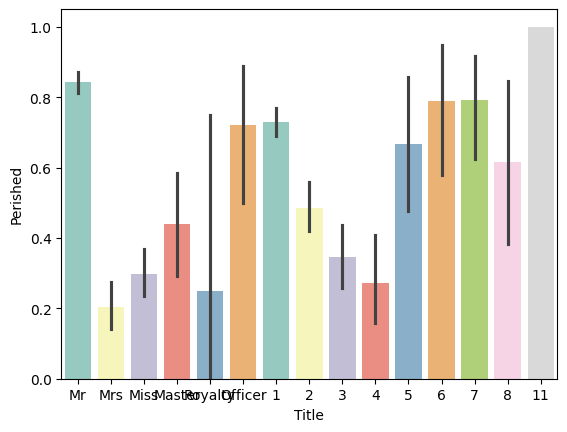

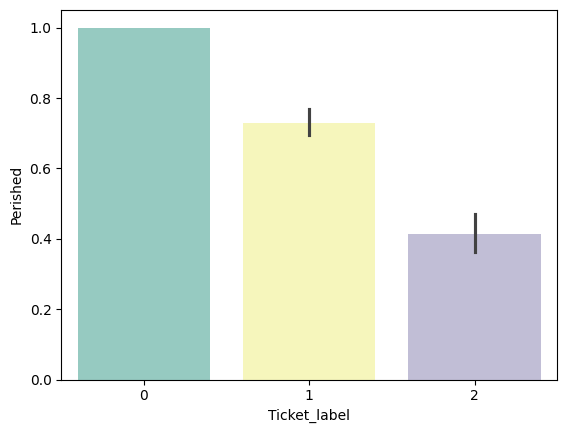

Pclass           0
Age              0
Fare             0
Family_label     0
Ticket_label     0
Sex_0            0
Sex_1            0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64


In [89]:
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# --- 前処理 (replace推奨) ---
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})

features = ['Pclass', 'Sex', 'SibSp', 'Parch']

# --- 改善ポイント: 学習用とテスト用を縦に結合して、使えるデータを全部使う ---
# 全データを作成
df_all = pd.concat([df, df_test], sort=False)

# Ageが「ある」人全員（学習データ + テストデータ）-> これで先生(モデル)を育てる
known_age_all = df_all[df_all['Age'].notnull()]

# Ageが「ない」人（後で予測する対象）
unknown_age_df = df[df['Age'].isnull()]
unknown_age_test = df_test[df_test['Age'].isnull()]

# --- モデル学習 ---
# 先生(モデル)に渡すデータが増えるので、より賢くなる！
rf_model = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rf_model.fit(known_age_all[features], known_age_all['Age'])

# --- 予測と代入 ---
# df の欠損を埋める
predicted_ages_df = rf_model.predict(unknown_age_df[features])
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages_df

# df_test の欠損を埋める
predicted_ages_test = rf_model.predict(unknown_age_test[features])
df_test.loc[df_test['Age'].isnull(), 'Age'] = predicted_ages_test

# 確認
print("Train欠損数:", df['Age'].isnull().sum())
print("Test欠損数:", df_test['Age'].isnull().sum())
# ------------ Surname ------------
# NameからSurname(苗字)を抽出
df['Surname'] = df['Name'].map(lambda name:name.split(',')[0].strip())
df_test['Surname'] = df_test['Name'].map(lambda name:name.split(',')[0].strip())

# 同じSurname(苗字)の出現頻度をカウント(出現回数が2以上なら家族)
df['FamilyGroup'] = df['Surname'].map(df['Surname'].value_counts())
df_test['FamilyGroup'] = df_test['Surname'].map(df_test['Surname'].value_counts())

# 家族で16才以下または女性の生存率
Female_Child_Group=df.loc[(df['FamilyGroup']>=2) & ((df['Age']<=16) | (df['Sex']==1))]
Female_Child_Group=Female_Child_Group.groupby('Surname')['Perished'].mean()
print(Female_Child_Group.value_counts())

# 家族で16才超えかつ男性の生存率
Male_Adult_Group=df.loc[(df['FamilyGroup']>=2) & (df['Age']>16) & (df['Sex']==0)]
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Perished'].mean()
print(Male_Adult_List.value_counts())

# ------------ Name --------------
# Nameから敬称(Title)を抽出し、グルーピング
df['Title'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
df['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
df['Title'].replace(['Mlle'], 'Miss', inplace=True)
df['Title'].replace(['Jonkheer'], 'Master', inplace=True)
sns.barplot(x='Title', y='Perished', data=df, palette='Set3')

df_test['Title'] = df_test['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df_test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
df_test['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df_test['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
df_test['Title'].replace(['Mlle'], 'Miss', inplace=True)
df_test['Title'].replace(['Jonkheer'], 'Master', inplace=True)


Dead_list=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==1)].index)
Survived_list=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==0)].index)

# デッドリストとサバイブリストの表示
print('Dead_list = ', Dead_list)
print('Survived_list = ', Survived_list)

# デッドリストとサバイブリストをSex, Age, Title に反映させる
df.loc[(df['Perished'].isnull()) & (df['Surname'].apply(lambda x:x in Dead_list)),\
             ['Sex','Age','Title']] = ['male',28.0,'Mr']
df.loc[(df['Perished'].isnull()) & (df['Surname'].apply(lambda x:x in Survived_list)),\
             ['Sex','Age','Title']] = ['female',5.0,'Mrs']
df_test.loc[(df['Perished'].isnull()) & (df_test['Surname'].apply(lambda x:x in Dead_list)),\
             ['Sex','Age','Title']] = ['male',28.0,'Mr']
df_test.loc[(df['Perished'].isnull()) & (df_test['Surname'].apply(lambda x:x in Survived_list)),\
             ['Sex','Age','Title']] = ['female',5.0,'Mrs']
# ----------- Family -------------
# Family = SibSp + Parch + 1 を特徴量とし、グルーピング
df['Family']=df['SibSp']+df['Parch']+1
df.loc[(df['Family']>=2) & (df['Family']<=4), 'Family_label'] = 2
df.loc[(df['Family']>=5) & (df['Family']<=7) | (df['Family']==1), 'Family_label'] = 1  # == に注意
df.loc[(df['Family']>=8), 'Family_label'] = 0

df_test['Family']=df_test['SibSp']+df_test['Parch']+1
df_test.loc[(df_test['Family']>=2) & (df_test['Family']<=4), 'Family_label'] = 2
df_test.loc[(df_test['Family']>=5) & (df_test['Family']<=7) | (df_test['Family']==1), 'Family_label'] = 1  # == に注意
df_test.loc[(df_test['Family']>=8), 'Family_label'] = 0

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 全データ（Train + Test）でチケットの出現回数を数える
# concatで縦につなげて、Ticket列だけを取り出します
all_ticket_counts = pd.concat([df['Ticket'], df_test['Ticket']]).value_counts().to_dict()

# 2. 辞書を使って、df と df_test の両方にマッピング
df['TicketGroup'] = df['Ticket'].map(all_ticket_counts)
df_test['TicketGroup'] = df_test['Ticket'].map(all_ticket_counts)

# --- ここで可視化（dfのみ） ---
# テストデータには 'Perished' がないので、グラフは df だけで描きます
sns.barplot(x='TicketGroup', y='Perished', data=df, palette='Set3')
plt.show()

# 3. ラベル付け（グルーピング）の処理
# 両方に同じ処理をするので、ループで回すとミスが減ります
for data in [df, df_test]:
    # 初期値を設定（条件に当てはまらないものがNaNにならないように）
    data['Ticket_label'] = 0

    # 条件分岐
    # 2〜4人: 生存率高い (2)
    data.loc[(data['TicketGroup'] >= 2) & (data['TicketGroup'] <= 4), 'Ticket_label'] = 2

    # 5〜8人 または 1人: 生存率ふつう/低い (1)
    data.loc[(data['TicketGroup'] >= 5) & (data['TicketGroup'] <= 8) | (data['TicketGroup'] == 1), 'Ticket_label'] = 1

    # 11人以上: 生存率激低 (0)
    # (条件に漏れた 9, 10人なども初期値0でカバーされます)
    data.loc[(data['TicketGroup'] >= 11), 'Ticket_label'] = 0

# --- 結果の可視化 ---
sns.barplot(x='Ticket_label', y='Perished', data=df, palette='Set3')
plt.show()

# ----------- Fare -------------
# 欠損値を Embarked='S', Pclass=3 の平均値で補完
fare=df_test.loc[(df_test['Embarked'] == 'S') & (df_test['Pclass'] == 3), 'Fare'].median()
df_test['Fare']=df_test['Fare'].fillna(fare)

# ------------- 前処理 ---------------
# 推定に使用する項目を指定
df = df[['Perished','Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Ticket_label']]
df_test = df_test[['Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Ticket_label']]
# ラベル特徴量をワンホットエンコーディング
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)
df_test

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_test = df_test.iloc[:, 0:].values

# 各列の欠損値の数を表示
print(df_test.isnull().sum())
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier



In [90]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier

# ==========================================
# 0. データ準備（列合わせ・NaN処理）
# ==========================================
# 列の不一致を解消（必須）
df, df_test = df.align(df_test, join='left', axis=1, fill_value=0)

# データを分離
y = df['Perished'].values
X = df.drop('Perished', axis=1).values
X_test = df_test.drop('Perished', axis=1).values

# ★重要: PolynomialFeaturesはNaNでエラーになるので、先に埋めるためのImputerを定義
imputer = SimpleImputer(strategy='median')

# ==========================================
# 1. LGBMパート: GridSearchで最強を探す
# ==========================================
print("--- LGBMのチューニング開始 ---")

# パイプライン定義（Imputer -> Poly -> Select -> Model）
pipe_lgbm = Pipeline([
    ('imputer', imputer), # ここでNaNを埋める
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('selection', SelectFromModel(
        LGBMClassifier(n_estimators=100, random_state=0, verbose=-1),
        threshold=-np.inf,
        max_features=20
    )),
    ('model', LGBMClassifier(random_state=0, verbose=-1))
])

# 探索パラメータ
param_grid = {
    'model__n_estimators': [100, 300],    # 時間短縮のため少し減らしています
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

# グリッドサーチ実行
gs_lgbm = GridSearchCV(
    pipe_lgbm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)
gs_lgbm.fit(X, y)

# ★ここで「最強のLGBMパイプライン」を獲得
best_lgbm_pipeline = gs_lgbm.best_estimator_
print(f"LGBM Best Score: {gs_lgbm.best_score_}")


# ==========================================
# 2. RandomForestパート: パイプライン化
# ==========================================
# RFも同様にパイプラインにします（今回は時間の都合でGridSearchせず、固定パラメータで組みます）
# もちろん、ここもGridSearchしてもOKです
pipe_rf = make_pipeline(
    imputer, # NaN埋め
    PolynomialFeatures(degree=2, include_bias=False),
    SelectFromModel(
        RandomForestClassifier(n_estimators=100, random_state=0),
        threshold=-np.inf,
        max_features=20
    ),
    RandomForestClassifier(n_estimators=300, max_depth=7, random_state=0)
)

# ==========================================
# 3. LogisticRegressionパート
# ==========================================
pipe_lr = make_pipeline(
    imputer,
    StandardScaler(),
    LogisticRegression(C=1.0, random_state=0, max_iter=1000)
)

# ==========================================
# 4. Votingで合体させる
# ==========================================
print("\n--- Votingアンサンブル学習開始 ---")

voting_model = VotingClassifier(
    estimators=[
        ('lgbm_tuned', best_lgbm_pipeline), # 1. チューニング済みの最強LGBM
        ('rf_poly', pipe_rf),               # 2. 多項式特徴量を入れたRF
        ('lr', pipe_lr)                     # 3. 線形モデル
    ],
    voting='soft'
)

# 全データで最終学習
voting_model.fit(X, y)
print("学習完了！")

# ==========================================
# 5. 予測と提出
# ==========================================
predictions = voting_model.predict(X_test)



--- LGBMのチューニング開始 ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
LGBM Best Score: 0.8417425145941875

--- Votingアンサンブル学習開始 ---
学習完了！


In [96]:
from sklearn.model_selection import cross_val_score

# -------------------------------------------------------
# 1. 訓練スコア（Train Score）
# -------------------------------------------------------
# モデルがどれだけ過去問（訓練データ）を覚えているか
train_score = voting_model.score(X, y)
print(f"訓練スコア (Accuracy): {train_score:.4f}")

# -------------------------------------------------------
# 2. CVスコア（Cross Validation Score）
# -------------------------------------------------------
# モデルの実力値（テストデータでどれくらい取れそうか）
# ※ Voting全体を5回学習し直すので、少し時間がかかります
print("CVスコア計測中...")
cv_scores = cross_val_score(voting_model, X, y, cv=5, scoring='accuracy')

print(f"CV各回のスコア: {cv_scores}")
print(f"CV平均スコア : {cv_scores.mean():.4f}")

訓練スコア (Accuracy): 0.8889
CVスコア計測中...
CV各回のスコア: [0.8547486  0.8258427  0.85955056 0.8258427  0.87078652]
CV平均スコア : 0.8474


In [91]:
path = '/content/drive/MyDrive/02.コンペ1（10 28公開済）/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [92]:
predictions.shape

(418,)

In [93]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [94]:
submission['Perished'] = predictions
submission

,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [95]:
# Google Drive・Google Colaboratoryで作業する場合
submission.to_csv('submission.csv',index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>